In [24]:
using Revise
using Pkg
Pkg.activate("./..")
using LuxorInteractive

  Activating project at `~/MEGA/EMAp/LuxorInteractive.jl`


In [25]:
using Luxor
using JSServe
using EzXML

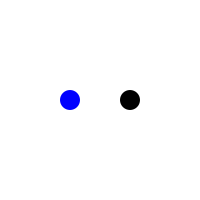

In [53]:
d1 = Drawing(200,200,:svg)
origin()
circle(O+Point(30,0),10,:fill)
finish()

d2 = Drawing(200,200,:svg)
origin()
setcolor("blue")
circle(Point(-30,0),10,:fill)
finish()

d = Drawing(200,200,:svg)
@group "circle" begin
    placeimage(d1)
end

@group "circle" begin
    placeimage(d2)
end
finish()
d

In [100]:
dxml = parsedrawing(d)
println(dxml)

<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="200pt" height="200pt" viewBox="0 0 200 200" version="1.1" id="luxor301">
<g id="surface289">
<path style="fill:none;stroke-width:2;stroke-linecap:round;stroke-linejoin:miter;stroke:rgb(100%,100%,100%);stroke-opacity:0.274;stroke-miterlimit:10;" d="M 0 0 L 0 0 " id="lxog1" class="circle lxog1 luxor301"/>
<path style=" stroke:none;fill-rule:nonzero;fill:rgb(0%,0%,0%);fill-opacity:1;" d="M 140 100 C 140 105.523438 135.523438 110 130 110 C 124.476562 110 120 105.523438 120 100 C 120 94.476562 124.476562 90 130 90 C 135.523438 90 140 94.476562 140 100 " id="lx1" class="circle lx1 luxor301"/>
<path style="fill:none;stroke-width:2;stroke-linecap:square;stroke-linejoin:miter;stroke:rgb(100%,100%,100%);stroke-opacity:0.274;stroke-miterlimit:10;" d="M 0 0 L 0 0 " id="lxcg1" class="circle lxcg1 luxor301"/>
<path style="fill:none;stroke-width:2;stroke-linecap:round;strok

In [101]:
Page(exportable=true, offline=true);

pathstyles = extractpathsstyles!(dxml)
mycss =  pathstyles * """
\n
.circle:hover {
    fill: #ec008c;
    opacity: 1;
}
"""

"\n.lxog1.luxor301{fill:none;stroke-width:2;stroke-linecap:round;stroke-linejoin:miter;stroke:rgb(100%,100%,100%);stroke-opacity:0.274;stroke-miterlimit:10;}\n.lx1.luxor301{ stroke:none;fill-rule:nonzero;fill:rgb(0%,0%,0%);fill-opacity:1;}\n.lxcg1.luxor301{fill:none;stroke-w" ⋯ 300 bytes ⋯ "one;fill-rule:nonzero;fill:rgb(0%,0%,100%);fill-opacity:1;}\n.lxcg2.luxor301{fill:none;stroke-width:2;stroke-linecap:square;stroke-linejoin:miter;stroke:rgb(100%,100%,100%);stroke-opacity:0.274;stroke-miterlimit:10;}\n\n.circle:hover {\n    fill: #ec008c;\n    opacity: 1;\n}\n"

In [102]:
# DOM.svg_unesc(string(dxml),DOM.style(mycss))
println(pathstyles)
println(dxml)


.lxog1.luxor301{fill:none;stroke-width:2;stroke-linecap:round;stroke-linejoin:miter;stroke:rgb(100%,100%,100%);stroke-opacity:0.274;stroke-miterlimit:10;}
.lx1.luxor301{ stroke:none;fill-rule:nonzero;fill:rgb(0%,0%,0%);fill-opacity:1;}
.lxcg1.luxor301{fill:none;stroke-width:2;stroke-linecap:square;stroke-linejoin:miter;stroke:rgb(100%,100%,100%);stroke-opacity:0.274;stroke-miterlimit:10;}
.lxog2.luxor301{fill:none;stroke-width:2;stroke-linecap:round;stroke-linejoin:miter;stroke:rgb(100%,100%,100%);stroke-opacity:0.274;stroke-miterlimit:10;}
.lx2.luxor301{ stroke:none;fill-rule:nonzero;fill:rgb(0%,0%,100%);fill-opacity:1;}
.lxcg2.luxor301{fill:none;stroke-width:2;stroke-linecap:square;stroke-linejoin:miter;stroke:rgb(100%,100%,100%);stroke-opacity:0.274;stroke-miterlimit:10;}
<?xml version="1.0" encoding="UTF-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="200pt" height="200pt" viewBox="0 0 200 200" version="1.1" id="luxor301">
<g id="surf

In [103]:

App() do session::Session
    return DOM.div(style="visibility: visible;",DOM.h1("Luxor Interactive"),
        DOM.svg_unesc(string(dxml),
            height="$(d.height)pt",
            width = "$(d.width)pt",
            DOM.style(mycss)))
end

App(JSServe.var"#1#5"{var"#29#30"}(var"#29#30"()))